- Temperature is going predict with the help of linear Regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('weatherHistory.csv',date_parser=True,nrows=2000)

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
1995,2006-12-03 03:00:00.000 +0100,Foggy,snow,-1.627778,-1.627778,0.96,3.2200,110.0,0.3220,0.0,1027.37,Foggy starting overnight continuing until even...
1996,2006-12-03 04:00:00.000 +0100,Foggy,snow,-2.155556,-2.155556,1.00,3.5581,69.0,0.1610,0.0,1027.11,Foggy starting overnight continuing until even...
1997,2006-12-03 05:00:00.000 +0100,Foggy,snow,-2.127778,-2.127778,0.96,1.5456,155.0,0.1610,0.0,1026.89,Foggy starting overnight continuing until even...
1998,2006-12-03 06:00:00.000 +0100,Foggy,snow,-2.105556,-2.105556,1.00,4.6529,88.0,0.1932,0.0,1026.85,Foggy starting overnight continuing until even...
1999,2006-12-03 07:00:00.000 +0100,Foggy,snow,-2.094444,-2.094444,1.00,3.9928,98.0,0.0483,0.0,1026.53,Foggy starting overnight continuing until even...


In [6]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
len(data.columns)

12

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            2000 non-null   object 
 1   Summary                   2000 non-null   object 
 2   Precip Type               2000 non-null   object 
 3   Temperature (C)           2000 non-null   float64
 4   Apparent Temperature (C)  2000 non-null   float64
 5   Humidity                  2000 non-null   float64
 6   Wind Speed (km/h)         2000 non-null   float64
 7   Wind Bearing (degrees)    2000 non-null   float64
 8   Visibility (km)           2000 non-null   float64
 9   Loud Cover                2000 non-null   float64
 10  Pressure (millibars)      2000 non-null   float64
 11  Daily Summary             2000 non-null   object 
dtypes: float64(8), object(4)
memory usage: 187.6+ KB


In [9]:
round(data.describe(),1)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,12.1,11.3,0.8,9.8,204.4,9.4,0.0,989.5
std,8.5,9.5,0.2,6.0,96.6,4.5,0.0,168.3
min,-8.6,-11.9,0.3,0.0,0.0,0.0,0.0,0.0
25%,4.9,2.4,0.7,4.9,142.0,6.5,0.0,1010.2
50%,13.1,13.1,0.8,9.1,210.0,10.0,0.0,1014.7
75%,17.9,17.9,0.9,13.4,288.2,11.3,0.0,1024.3
max,32.6,35.5,1.0,36.4,359.0,16.1,0.0,1042.3


In [10]:
data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
data.nunique()

Formatted Date              2000
Summary                        9
Precip Type                    2
Temperature (C)             1311
Apparent Temperature (C)    1445
Humidity                      67
Wind Speed (km/h)            923
Wind Bearing (degrees)       344
Visibility (km)              339
Loud Cover                     1
Pressure (millibars)        1342
Daily Summary                 32
dtype: int64

In [12]:
data.duplicated().sum()

0

### EDA (Data Exploratory Analysis)

In [13]:
data['Daily Summary'].value_counts().sort_values(ascending=False).head()

Mostly cloudy throughout the day.         264
Mostly cloudy until night.                168
Partly cloudy starting in the morning.    144
Foggy throughout the day.                 144
Foggy in the morning.                     144
Name: Daily Summary, dtype: int64

In [14]:
data['Precip Type'].value_counts().sort_values(ascending=False).head()

rain    1799
snow     201
Name: Precip Type, dtype: int64

## Precip Type contribution inside the kind of season.

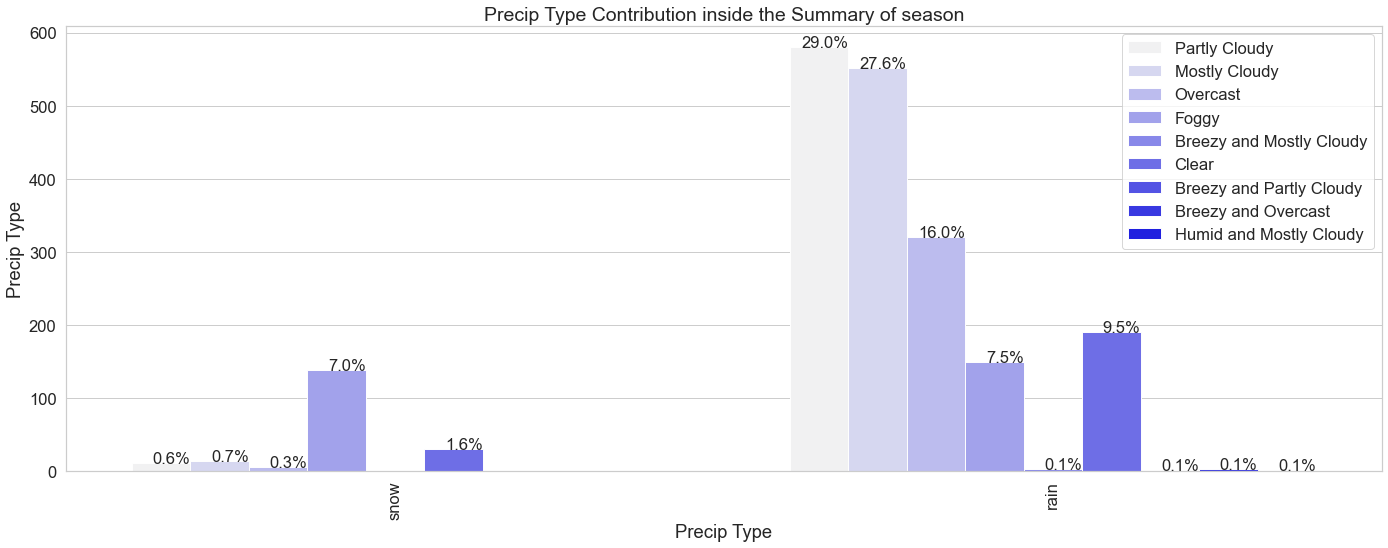

In [15]:
plt.figure(figsize=(20,8),dpi=70)
sns.set(style="whitegrid")
ax=sns.countplot(data['Precip Type'].sort_values(ascending=False),color='blue',hue=data['Summary'])
plt.title('Precip Type Contribution inside the Summary of season',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(rotation=90)
plt.xlabel('Precip Type',fontsize=19)
plt.ylabel('Precip Type',fontsize=19)
plt.legend(fontsize=17)
total = float(len(data))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',fontsize=17)
plt.tight_layout()
plt.show()

### Summary Contribution inside the data.

In [16]:
data['Summary'].value_counts().sort_values(ascending=False)

Partly Cloudy               591
Mostly Cloudy               566
Overcast                    326
Foggy                       288
Clear                       221
Breezy and Mostly Cloudy      3
Breezy and Overcast           3
Breezy and Partly Cloudy      1
Humid and Mostly Cloudy       1
Name: Summary, dtype: int64

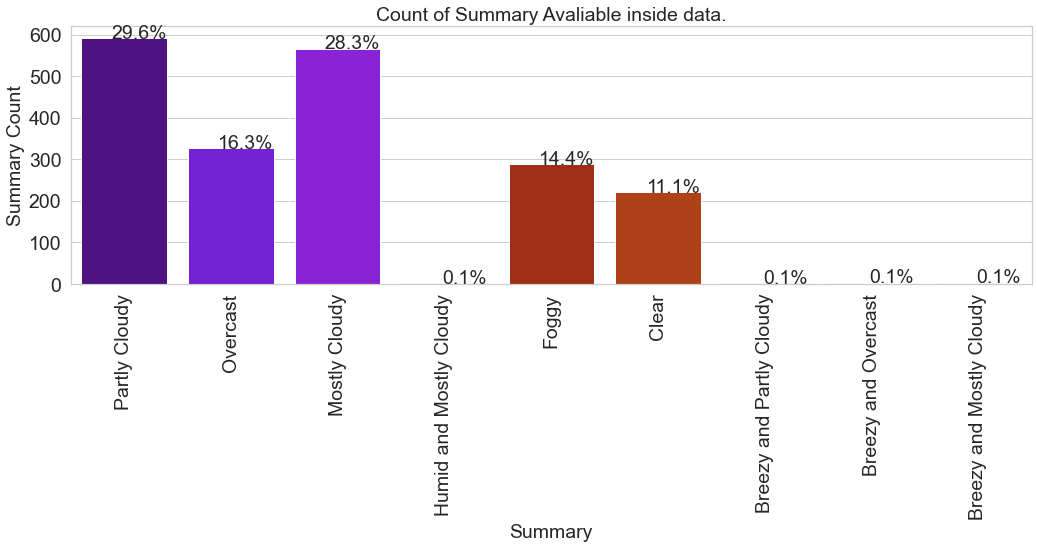

In [17]:
plt.figure(figsize=(15,8),dpi=70)
ax = sns.countplot(data['Summary'].sort_values(ascending=False),palette="gnuplot")
plt.title('Count of Summary Avaliable inside data.',fontsize=20,)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Summary',fontsize=20)
plt.ylabel('Summary Count',fontsize=20)
plt.xticks(rotation=90)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right',fontsize=20)
plt.tight_layout()
plt.show()
plt.show()

### Finding the Temperature and Apparent Temperature in the contrast of Precip Type.

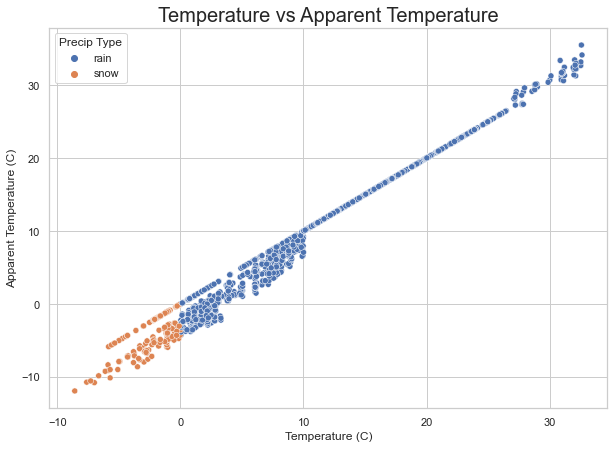

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7)) 
plt.title('Temperature vs Apparent Temperature',fontsize=20)
sns.scatterplot(x='Temperature (C)',y='Apparent Temperature (C)',data=data,hue='Precip Type')
plt.show()

In [19]:
import plotly as py
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)

### Humidity Vs Wind Speed (KM/hr) Relationship.

In [20]:
data.iplot(kind='scatter',x='Humidity',y='Wind Speed (km/h)',title='Humidity Vs Wind Speed (km/h)',xTitle='Humidity',yTitle='Wind Speed',mode='markers')

### Relationship Inbetween the Humidity Vs Wind Speed (km/hr) in the contrast of Precip Type and Humidity.

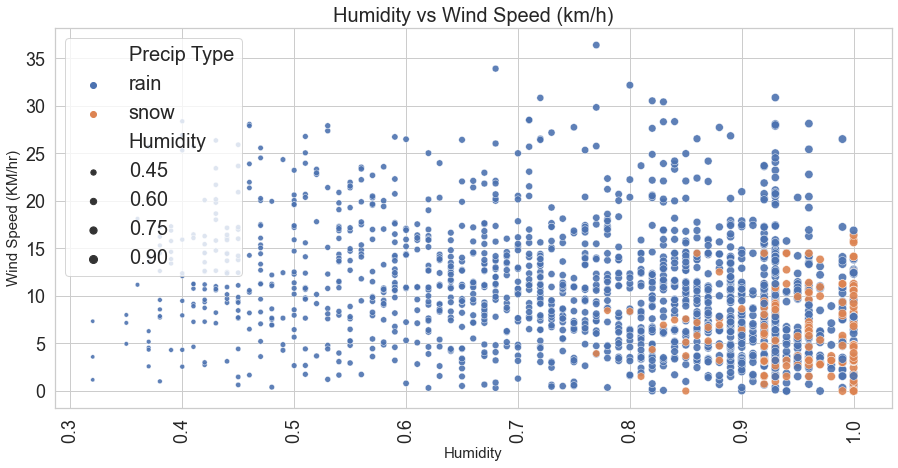

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Humidity vs Wind Speed (km/h)',fontsize=20)
sns.scatterplot(x='Humidity',y='Wind Speed (km/h)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Humidity')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.xlabel('Humidity',fontsize=15)
plt.ylabel('Wind Speed (KM/hr)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Relationship Inbetween the Humidity Vs Wind Speed (km/hr) in the contrast of Precip Type and Pressure.

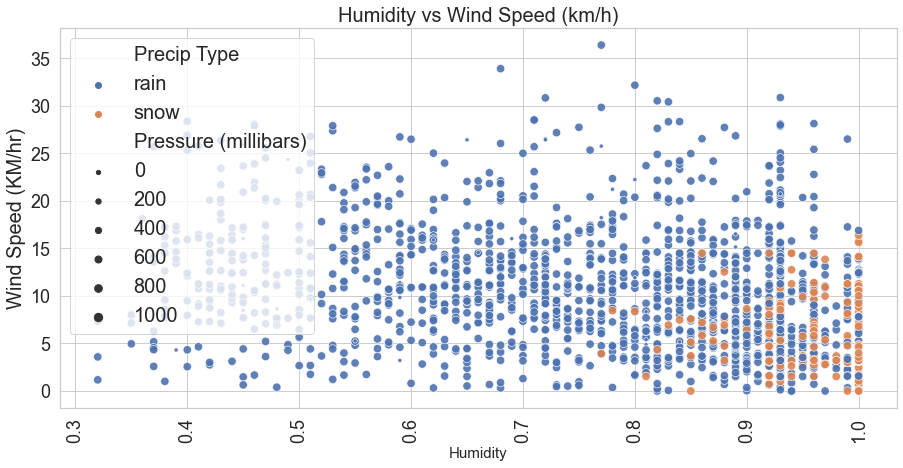

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Humidity vs Wind Speed (km/h)',fontsize=20)
sns.scatterplot(x='Humidity',y='Wind Speed (km/h)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Pressure (millibars)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.xlabel('Humidity',fontsize=15)
plt.ylabel('Wind Speed (KM/hr)',fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Relationship Inbetween the Wind Speed (km/h) Vs Wind Bearing (degrees) in the contrast of Precip Type and Humidity.

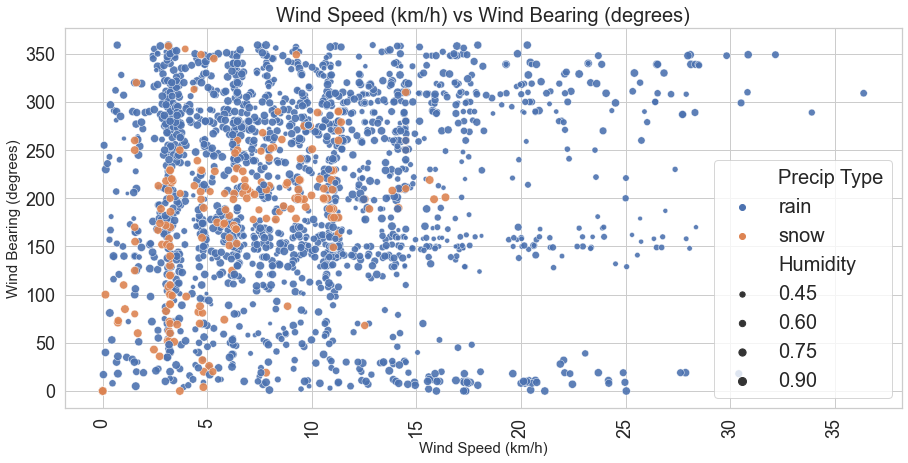

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Wind Speed (km/h) vs Wind Bearing (degrees)',fontsize=20)
sns.scatterplot(x='Wind Speed (km/h)',y='Wind Bearing (degrees)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Humidity')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.xlabel('Wind Speed (km/h)',fontsize=15)
plt.ylabel('Wind Bearing (degrees)',fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Relationship Inbetween the Wind Bearing (degrees) Vs Wind Speed (km/h) in the contrast of Precip Type and Temperature (C).

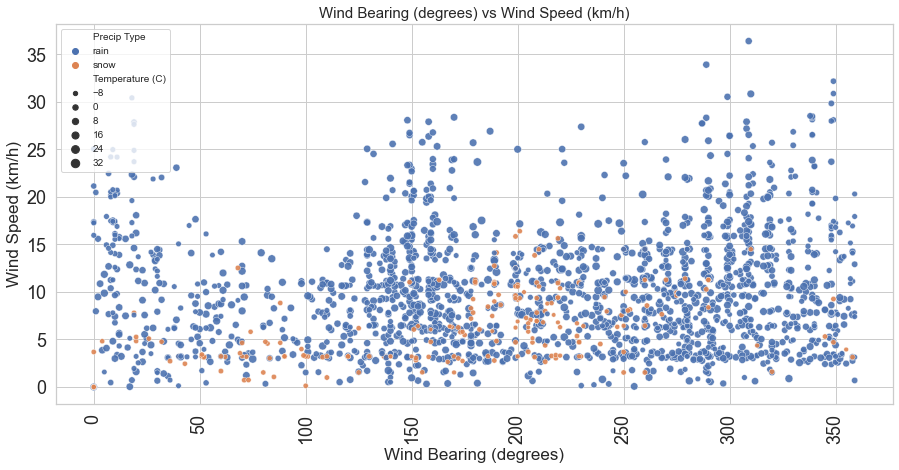

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Wind Bearing (degrees) vs Wind Speed (km/h)',fontsize=15)
sns.scatterplot(x='Wind Bearing (degrees)',y='Wind Speed (km/h)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Temperature (C)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.xlabel('Wind Bearing (degrees)',fontsize=17)
plt.ylabel('Wind Speed (km/h)',fontsize=17)
plt.xticks(rotation=90)
plt.show()

### Relationship Inbetween the Wind Bearing (degrees) Vs Wind Speed (km/h) in the contrast of Precip Type and Temperature (C).

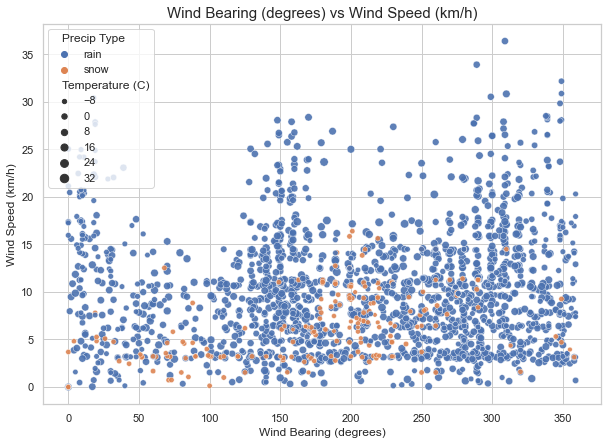

In [210]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7)) 
plt.title('Wind Bearing (degrees) vs Wind Speed (km/h)',fontsize=15)
sns.scatterplot(x='Wind Bearing (degrees)',y='Wind Speed (km/h)',data=data,alpha=0.9,size='Temperature (C)',hue='Precip Type')
plt.show()

### Relationship Inbetween the Wind Bearing (degrees) Vs Visibility in the contrast of Precip Type and Temperature (C).

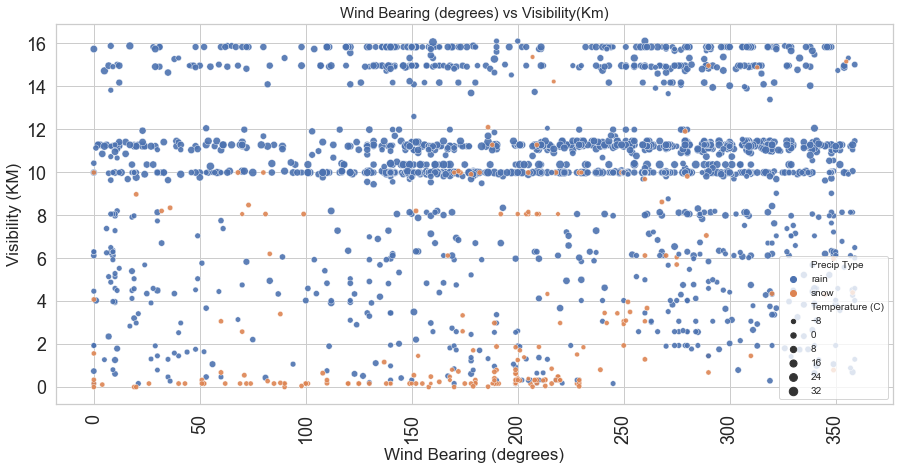

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Wind Bearing (degrees) vs Visibility(Km)',fontsize=15)
sns.scatterplot(x='Wind Bearing (degrees)',y='Visibility (km)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Temperature (C)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.xlabel('Wind Bearing (degrees)',fontsize=17)
plt.ylabel('Visibility (KM)',fontsize=17)
plt.xticks(rotation=90)
plt.show()

### Relationship Inbetween the Temperature (C) Vs Pressure (millibars) in the contrast of Precip Type and Temperature (C).

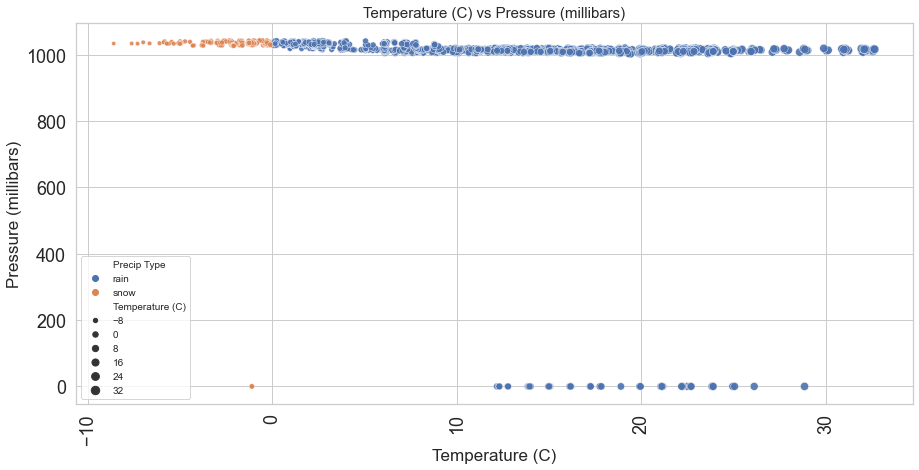

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))  
plt.title('Temperature (C) vs Pressure (millibars)',fontsize=15)
sns.scatterplot(x='Temperature (C)',y='Pressure (millibars)',data=data,alpha=0.9,hue='Precip Type',markers=True,size='Temperature (C)')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=90)
plt.legend(fontsize=10)
plt.xlabel('Temperature (C)',fontsize=17)
plt.ylabel('Pressure (millibars)',fontsize=17)
plt.xticks(rotation=90)
plt.show()

## Plot Between The Humidity and Temperature.

In [41]:
data[['Humidity','Temperature (C)']].cumsum().iplot()

In [37]:
data['Formatted Date'] = data['Formatted Date'].map(pd.to_datetime)

In [38]:
data['Formatted Date'][0]

Timestamp('2006-04-01 00:00:00+0200', tz='pytz.FixedOffset(120)')

### Feature Distribution 

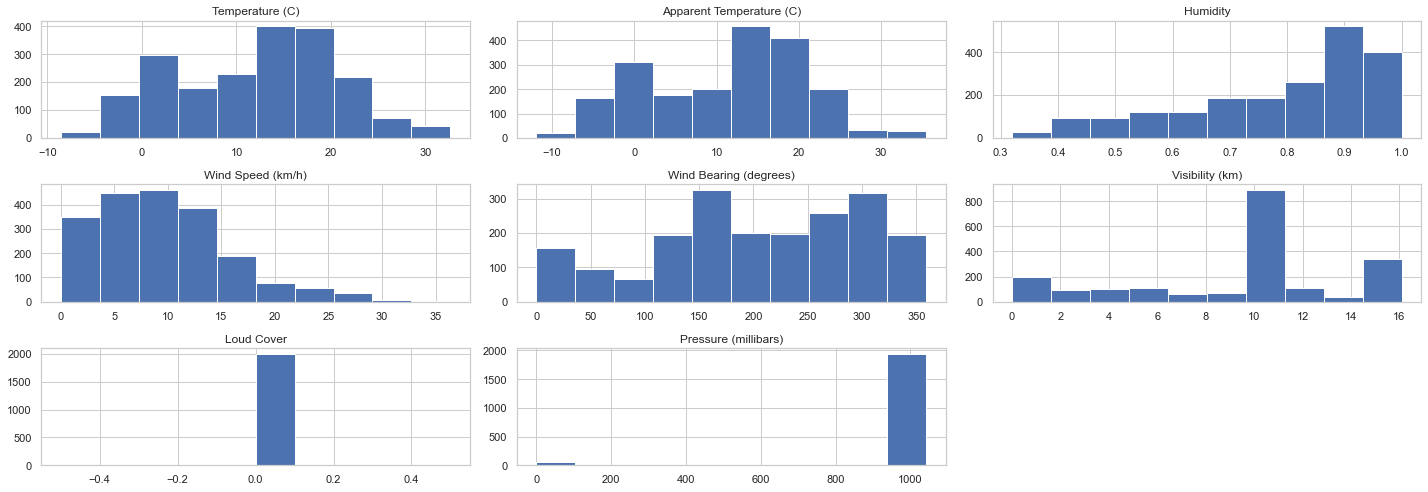

In [44]:
fig,ax = plt.subplots(figsize=(20,7))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

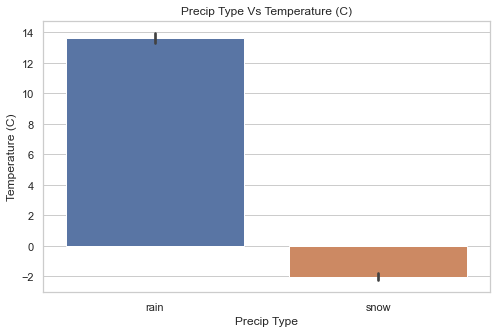

In [49]:
plt.figure(figsize=(8,5))
ax1=sns.barplot(data['Precip Type'],data['Temperature (C)'])
plt.title('Precip Type Vs Temperature (C)')
plt.show()

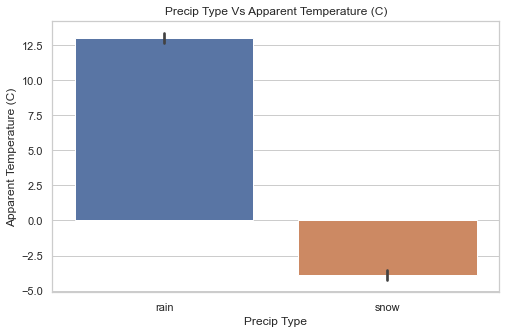

In [50]:
plt.figure(figsize=(8,5))
ax2=sns.barplot(data['Precip Type'],data['Apparent Temperature (C)'])
plt.title('Precip Type Vs Apparent Temperature (C)')
plt.show()

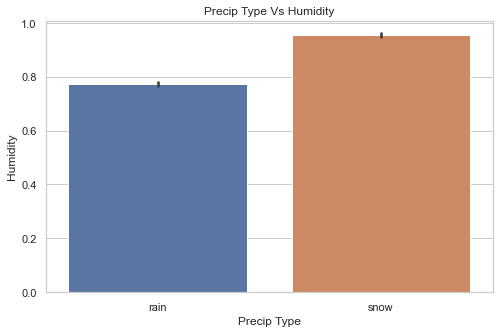

In [52]:
plt.figure(figsize=(8,5))
ax3=sns.barplot(data['Precip Type'],data['Humidity'])
plt.title('Precip Type Vs Humidity')
plt.show()

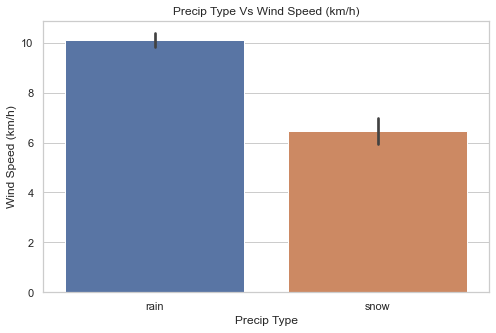

In [53]:
plt.figure(figsize=(8,5))
ax4=sns.barplot(data['Precip Type'],data['Wind Speed (km/h)'])
plt.title('Precip Type Vs Wind Speed (km/h)')
plt.show()

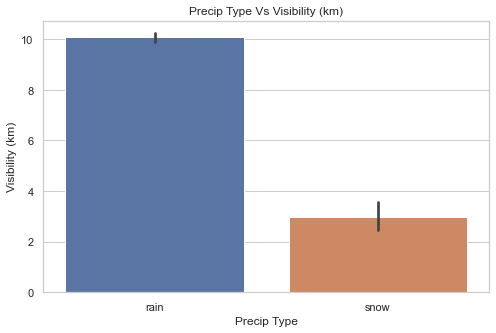

In [54]:
plt.figure(figsize=(8,5))
ax5=sns.barplot(data['Precip Type'],data['Visibility (km)'])
plt.title('Precip Type Vs Visibility (km)')
plt.show()

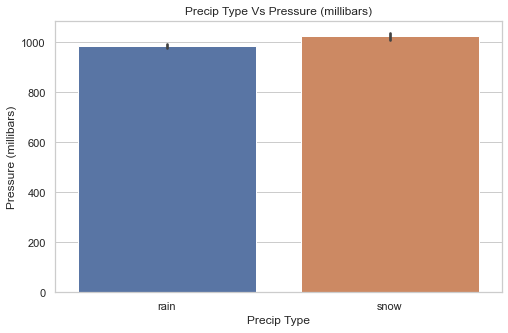

In [56]:
plt.figure(figsize=(8,5))
ax6=sns.barplot(data['Precip Type'],data['Pressure (millibars)'])
plt.title('Precip Type Vs Pressure (millibars)')
plt.show()

## Data Preprocessing

In [59]:
data.isnull().sum().sort_values(ascending=False).head()

Daily Summary             0
Pressure (millibars)      0
Loud Cover                0
Visibility (km)           0
Wind Bearing (degrees)    0
dtype: int64

In [60]:
data.shape

(2000, 12)

In [61]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [62]:
data.set_index(data['Formatted Date'],inplace=True)

In [63]:
data['Precip Type'].value_counts()

rain    1799
snow     201
Name: Precip Type, dtype: int64

In [64]:
data['Precip Type'].isnull().sum()/len(data.index)*100

0.0

In [65]:
data['Precip Type'].fillna('rain',inplace=True)

In [66]:
data['Precip Type'].value_counts()

rain    1799
snow     201
Name: Precip Type, dtype: int64

In [67]:
data.isnull().sum().sort_values(ascending=False).head()

Daily Summary             0
Pressure (millibars)      0
Loud Cover                0
Visibility (km)           0
Wind Bearing (degrees)    0
dtype: int64

In [68]:
data['Summary'].value_counts()

Partly Cloudy               591
Mostly Cloudy               566
Overcast                    326
Foggy                       288
Clear                       221
Breezy and Overcast           3
Breezy and Mostly Cloudy      3
Humid and Mostly Cloudy       1
Breezy and Partly Cloudy      1
Name: Summary, dtype: int64

In [69]:
data['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                    264
Mostly cloudy until night.                                           168
Partly cloudy starting in the morning.                               144
Foggy throughout the day.                                            144
Foggy in the morning.                                                144
Partly cloudy throughout the day.                                    120
Mostly cloudy until evening.                                         120
Foggy starting overnight continuing until morning.                    96
Partly cloudy until night.                                            96
Partly cloudy until evening.                                          96
Overcast throughout the day.                                          72
Partly cloudy starting in the afternoon.                              48
Mostly cloudy starting overnight continuing until night.              48
Foggy until morning.                               

### Check the Outliers Avalible for Target Variable.

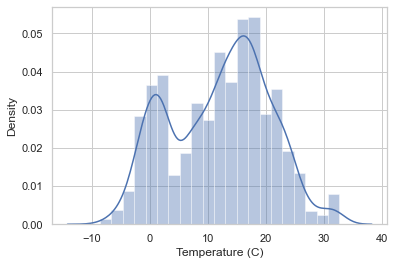

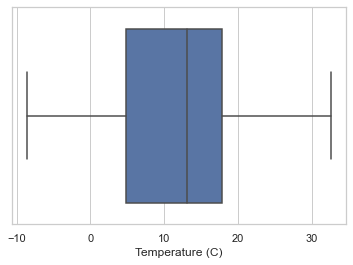

Skeness avalible in the data -0.10074593272799437
Kurltoisis Avaliabl in the data -0.7825209587061379


In [70]:
sns.distplot(data['Temperature (C)'])
plt.show()
sns.boxplot(data['Temperature (C)'])
plt.show()

print('Skeness avalible in the data',data['Temperature (C)'].skew())
print('Kurltoisis Avaliabl in the data',data['Temperature (C)'].kurt())

In that we having very few outliers so we will remove then move foreward.

In [71]:
Q1 = data['Temperature (C)'].quantile(0.25)
Q3 = data['Temperature (C)'].quantile(0.75)

IQR = Q3-Q1
IQR

12.972222222222229

In [72]:
dataiqr = data[~((data['Temperature (C)']<Q1-1.5*IQR)|(data['Temperature (C)']>Q3+1.5*IQR))]

In [73]:
dataiqr.shape

(2000, 12)

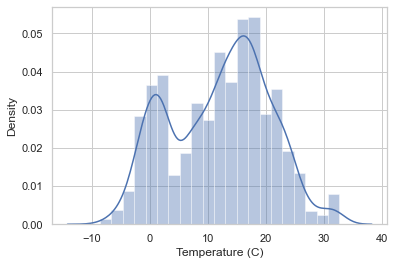

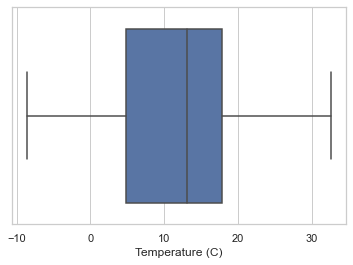

Skeness avalible in the dataiqr -0.10074593272799437
Kurltoisis Avaliabl in the dataiqr -0.7825209587061379


In [74]:
sns.distplot(dataiqr['Temperature (C)'])
plt.show()
sns.boxplot(dataiqr['Temperature (C)'])
plt.show()

print('Skeness avalible in the dataiqr',dataiqr['Temperature (C)'].skew())
print('Kurltoisis Avaliabl in the dataiqr',dataiqr['Temperature (C)'].kurt())

In [75]:
dataiqr.drop(columns=['Formatted Date'],inplace=True)

## Data Model

In [76]:
df = pd.get_dummies(dataiqr['Summary'],drop_first=True)
dff = pd.get_dummies(dataiqr['Precip Type'],drop_first=True)

In [77]:
data1 = pd.concat([df,dff],axis=1)

In [78]:
data2 = pd.concat([data1,dataiqr],axis=1)

In [79]:
data2.shape

(2000, 20)

In [80]:
data2.drop(columns=['Daily Summary'],inplace=True)

In [81]:
data2.drop(columns=['Precip Type'],inplace=True)

In [82]:
data2.drop(columns=['Summary'],inplace=True)

In [83]:
x = data2.drop(columns=['Temperature (C)'])
y = data2['Temperature (C)']

In [84]:
x.shape,y.shape

((2000, 16), (2000,))

In [85]:
from sklearn.feature_selection import f_regression

In [86]:
f_score,p_values=f_regression(x,y)

In [87]:
p_values

array([9.03109930e-001, 2.45696329e-001, 1.27268719e-002, 2.16851432e-149,
       3.00564753e-001, 4.96191519e-034, 2.53016993e-010, 7.49186340e-043,
       2.35316827e-159, 0.00000000e+000, 3.05369636e-247, 1.41631668e-009,
       1.51853947e-005, 1.80677032e-168,             nan, 3.59927458e-011])

In [88]:
P_values = pd.Series(p_values,index=x.columns)

In [89]:
P_values.sort_values(ascending=False,inplace=True)

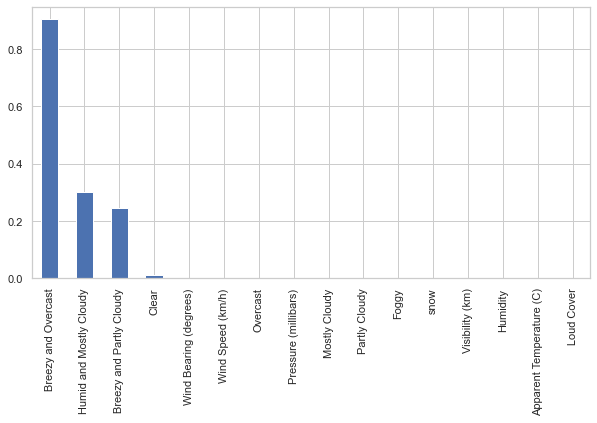

In [90]:
plt.figure(figsize=(10,5))
P_values.plot(kind='bar')
plt.show()

From The we can there are most feature which having the high P_values.Whichever having the high P_values which are less important for us.

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression

In [79]:
sel = SelectKBest(f_regression,k=10)

In [80]:
sel.fit_transform(x,y)

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.41197e+01,
        1.58263e+01, 1.01513e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.42646e+01,
        1.58263e+01, 1.01563e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 3.92840e+00,
        1.49569e+01, 1.01594e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.54560e+00,
        1.61000e-01, 1.02689e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.65290e+00,
        1.93200e-01, 1.02685e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.99280e+00,
        4.83000e-02, 1.02653e+03]])

In [81]:
X = sel.transform(x)

In [82]:
type(X)

numpy.ndarray

In [83]:
X.shape

(2000, 10)

In [84]:
Features= x.columns[sel.get_support()]

In [85]:
Features

Index(['Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'snow',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

### Split The Data

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=42)

In [87]:
X_train.shape,X_test.shape

((1600, 10), (400, 10))

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### Remove Constant and Duplicated

In [90]:
from sklearn.feature_selection import VarianceThreshold

In [91]:
XX_train = pd.DataFrame(X_train)
XX_test  = pd.DataFrame(X_test)

In [92]:
XX_train.shape,XX_test.shape

((1600, 10), (400, 10))

To remove the duplicated data.

In [93]:
x_train_T = XX_train.T
x_test_T  = XX_test.T

In [94]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [95]:
duplicated_features = x_train_T.duplicated().sum()
duplicated_features

0

Since there is no any duplicated data avalible so move foreward.

In [96]:
X_train.shape,X_test.shape

((1600, 10), (400, 10))

## Use The Pearson Correlation matrix to identify the correation features.

In [97]:
X_train = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)

In [98]:
corrmat = X_train.corr()
corrmat

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.251196,-0.175528,-0.262855,0.521360,-0.522960,0.409365,-0.192219,-0.752111,0.081697
1,-0.251196,1.000000,-0.275126,-0.412003,-0.155074,0.265447,-0.192698,0.108192,0.227435,0.041815
2,-0.175528,-0.275126,1.000000,-0.287896,-0.106664,-0.177198,0.181396,0.183627,-0.035431,-0.023258
3,-0.262855,-0.412003,-0.287896,1.000000,-0.184004,0.299388,-0.318257,-0.045593,0.312877,0.014826
4,0.521360,-0.155074,-0.106664,-0.184004,1.000000,-0.525985,0.313986,-0.177801,-0.473686,0.064123
5,-0.522960,0.265447,-0.177198,0.299388,-0.525985,1.000000,-0.639769,0.068720,0.559210,-0.148937
6,0.409365,-0.192698,0.181396,-0.318257,0.313986,-0.639769,1.000000,-0.334130,-0.416942,0.054660
7,-0.192219,0.108192,0.183627,-0.045593,-0.177801,0.068720,-0.334130,1.000000,0.145978,-0.058988
8,-0.752111,0.227435,-0.035431,0.312877,-0.473686,0.559210,-0.416942,0.145978,1.000000,-0.060476
9,0.081697,0.041815,-0.023258,0.014826,0.064123,-0.148937,0.054660,-0.058988,-0.060476,1.000000


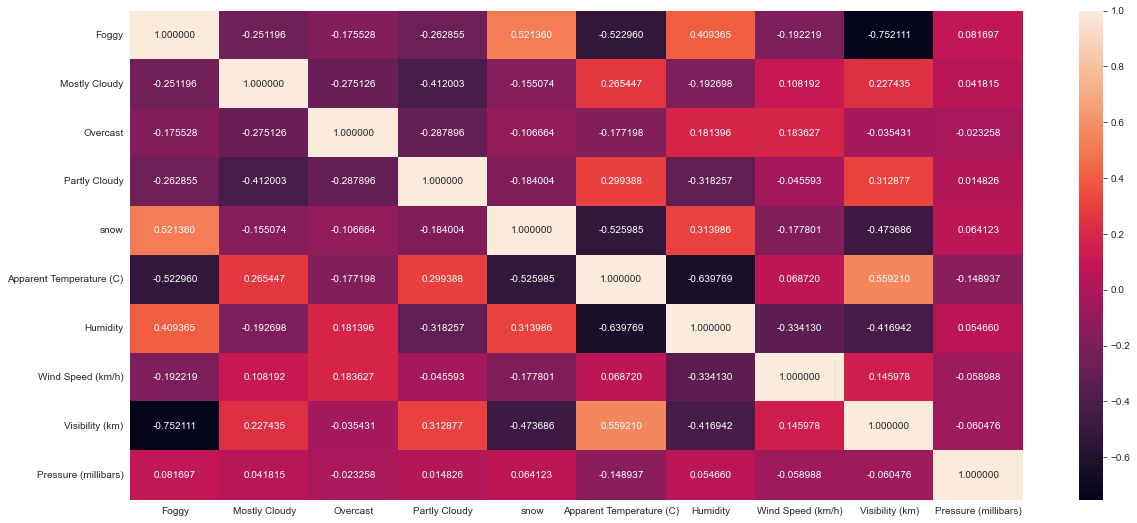

In [99]:
plt.figure(figsize=(20,9))
sns.heatmap(corrmat,annot=True,fmt='f',xticklabels=Features,yticklabels=Features)
plt.show()

**Somehow there is some features are mulicolinear each other.**

- We can that foggy and snow are highly correlated with the visibility(Km) and Appreant Temperature(C) respectively.
- In similar fashion the Humidity is also higly correlated with Appreant temperatures(C)
- Visibility distance is also correlated with the Dry and Partly cloudy.

### Create Linear Model and Fit the data,

In [100]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score,explained_variance_score,mean_squared_error

In [101]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy :-',r2_score(y_test,y_pred))

Accuracy :- 0.9917860618247859


In [102]:
sqrt_error = np.sqrt(mean_squared_error(y_test,y_pred))

In [103]:
sqrt_error

0.767325806674925

In [104]:
standard_deviation = np.std(y)
standard_deviation

8.534536910002922

In [105]:
dataframe = pd.DataFrame({'Y_actual':y_test,'Y_predited':y_pred})
dataframe

,Y_actual,Y_predited
Formatted Date,,
2006-12-24 12:00:00+01:00,3.094444,2.737944
2006-04-22 17:00:00+02:00,20.083333,19.797278
2006-08-04 13:00:00+02:00,19.933333,19.624103
2006-08-16 17:00:00+02:00,27.872222,26.775234
2006-08-30 17:00:00+02:00,14.911111,15.632729
...,...,...
2006-08-19 05:00:00+02:00,18.850000,18.360302
2006-08-30 12:00:00+02:00,12.827778,13.725013
2006-12-02 11:00:00+01:00,8.772222,8.410208


From the above if we observed that,**standard deviation is greater than mean_squared_error that means our model is good.**

### Cross-Varify by using testing data fit on the model.

In [106]:
cv_score = cross_val_score(model,X_train,y_train,scoring='r2',cv=10,n_jobs=-1,verbose=1)
cv_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


array([0.99140361, 0.99210362, 0.99191286, 0.99150474, 0.98956596,
       0.99158411, 0.98990118, 0.99057527, 0.99005831, 0.99081798])

In [107]:
print('Mean of r2_score :-',np.mean(cv_score))
print('Standard Deviation of r2_score :-',np.std(cv_score))

Mean of r2_score :- 0.9909427645981911
Standard Deviation of r2_score :- 0.0008450777813995305


Here we are able to get the mean is very close to 1 and stadard deviation among all the r2_score is less so from that we can say that our model is very consitant in nature.

In [108]:
test_score = model.score(X_test,y_test)
print('Test_Score :-',test_score)
train_score = model.score(X_train,y_train)
print('Train_Score :-',train_score)

Test_Score :- 0.9917860618247859
Train_Score :- 0.9911912527651342


- Here,we can see the Whe we had train the data on training data that time our R2 score is same as the model trained on test data.
- From that we can say our can say our **model neither overfitted nor Underfitted.**

## Analysing the Linear Regression by using OLS Model.

- by using this OLS Model we get the residual and Adjusted_R2 score.

In [109]:
import statsmodels.api as sm

In [110]:
x_constant=sm.add_constant(X)  #create an independent variable with name x_constant.

In [111]:
linear_regression = sm.OLS(y,x_constant).fit() #by using the shift+double we can get the info.

In [112]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.279e+04
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:54:17   Log-Likelihood:                -2376.4
No. Observations:                2000   AIC:                             4775.
Df Residuals:                    1989   BIC:                             4836.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8951      0.211      8.986      0.000       1.482       2.309
x1            -0.1775      0.095     -1.874      0.061      -0.363       0.008
x2            -0.1012      0.065     -1.553      0.121      -0.229       0.027
x3             0.1149      0.072      1.598      0.110      -0.026       0.256
x4             0.0496      0.065      0.765      0.445      -0.078       0.177
x5            -0.4689      0.076     -6.130      0.000      -0.619      -0.319
x6             0.8771      0.003    288.017      0.000       0.871       0.883
x7            -0.5805      0.152     -3.823      0.000      -0.878      -0.283
x8             0.0731      0.003     21.739      0.000       0.067       0.080
x9            -0.0182      0.007     -2.775      0.006      -0.031      -0.005
x10            0.0002      0.000      2.146      0.032    2.01e-05       0.000
==============================================================================
Omnibus:                       48.015   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.312
Skew:                          -0.237   Prob(JB):                     1.30e-08
Kurtosis:                       2.541   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
linear_regression.resid.head()

Formatted Date
2006-04-01 00:00:00+02:00    0.582076
2006-04-01 01:00:00+02:00    0.578597
2006-04-01 02:00:00+02:00   -0.376721
2006-04-01 03:00:00+02:00    0.631773
2006-04-01 04:00:00+02:00    0.566549
dtype: float64

In [114]:
linear_regression.predict(x_constant)[:5]

array([8.8901459 , 8.77695901, 9.75449917, 7.65711573, 8.189007  ])

In [115]:
y.head()

Formatted Date
2006-04-01 00:00:00+02:00    9.472222
2006-04-01 01:00:00+02:00    9.355556
2006-04-01 02:00:00+02:00    9.377778
2006-04-01 03:00:00+02:00    8.288889
2006-04-01 04:00:00+02:00    8.755556
Name: Temperature (C), dtype: float64

## Check The Assumptions of the Linear Regression.

### 1.No Autocorrelation:-

In [116]:
import statsmodels.tsa.api as smt   #tsa=time_series_analysis

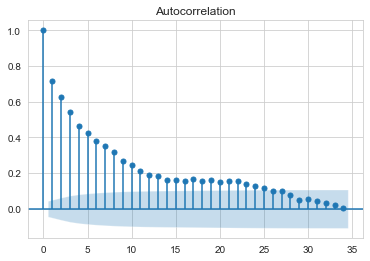

In [117]:
act = smt.graphics.plot_acf(linear_regression.resid)
act.show()

- In this kind of sernorio we have plot the Time Series Analysis in that we are finding the Autocorrelation of model.
- IF we see the correlation line that y_axis and x is the axis which is showing the range from 0 to 50.

**This is also called Durbin Test To check the Autocorrelation.**
- It basically ranges from the 0 to 40.
- 0-20 -- Possitive correlation
- 20  --- No-correlation 
- 20-40  -- Negetive correlation.

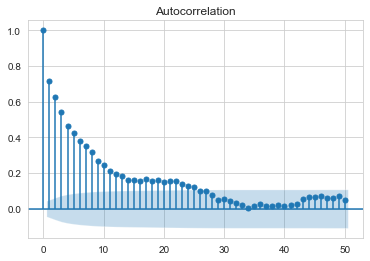

In [118]:
act = smt.graphics.plot_acf(linear_regression.resid,lags=50)
act.show()

## Normality of Residual

- Method-1

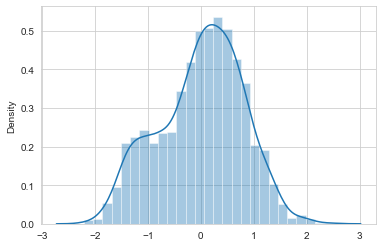

In [119]:
sns.distplot(linear_regression.resid)
plt.show()

- Method-2

## Jaque_bera Test 

- In this case we have the null hypothesis and Alternate Hypothesis:-
- Condition number -1 :- When we have **Joque-bera p_values** is greather than 5.99 that means our residual is normally distributed.
- Condition Number -2 :- When the above condition will not be satisfied that time we can say thta resual is not normally distributed.

In [120]:
from scipy.stats import jarque_bera

In [121]:
jarque_bera(linear_regression.resid)

Jarque_beraResult(statistic=36.312242101556116, pvalue=1.3028571888007434e-08)

- In this case our jarque bera score is greater than 5.99 that means our model is normaly distributed.

## Linearity 

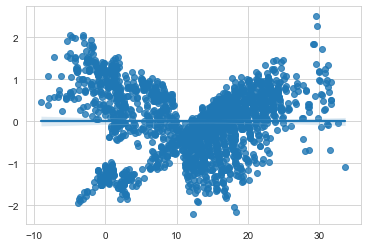

In [122]:
sns.regplot(linear_regression.predict(x_constant),linear_regression.resid)
plt.show()

- We can make the regplot inbetween the predicted and actual y.

- Another method of understanding the linearity that is linear_renbow test.

In [123]:
import statsmodels.api as sm

In [124]:
sm.stats.diagnostic.linear_rainbow(res=linear_regression)

(3.3178720743262007, 1.1730624620595503e-75)

- In this test p_value of the linear_renbow is greater than the 0.8736 > 0.05 that means there is linearity.

In [125]:
np.mean(linear_regression.resid)

7.074282271091192e-13

- Here we had found that mean of the linear_regression is nearest to zero that's means model residual is linear.

## Homocidasticity

- Method-1 
- In this method we can find the variance of data shold be constant along the residual or regression line.
- For we need to plot regplot inbetween the predicted and residual.
- Method-2 
- In this method we need to find the Homocidasticity is avalible or not by using GoldFread_test

In [126]:
import statsmodels.stats.api as sms

In [127]:
sms.het_goldfeldquandt(linear_regression.resid,linear_regression.model.exog)  #exog means all the input parameter.

(1.6081435872818761, 5.217718893246385e-14, 'increasing')

- p_values < 0.88 that means thats means here is no homocidasticity.

## Multi-colinearity

- In the model the indendent feature should not correlated to each other.If they correlated each other that's means there is some Co-linerarity.

**Variance Inflation Factor (VIF)**

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
vif = [variance_inflation_factor(x_constant,i) for i in range(x_constant.shape[1])]

In [130]:
vif

[140.3612810194226,
 3.4874533407464416,
 2.716989063438967,
 2.2282469565370406,
 2.762297572217615,
 1.668743435001789,
 2.6455001111337473,
 2.133554679886741,
 1.3013719697651742,
 2.7118008111200176,
 1.0564375922491482]

## Thanks !!